In [9]:
#import data
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [3]:
#read data
dt = pd.read_excel('data_query-tbl-details.xlsx')

In [4]:
#extract the numeric information from the table
dt['reduction'] = dt['Amount of Reductions'].str.replace(',','')

dt['reduction'] = dt['reduction'].str.extract(r'(?P<URL>^[0-9]+)').astype(int)
print(dt['reduction'])

dt['fee level'] = dt['Fee level'].str.extract(r'(?P<URL>[0-9]+)').astype(float)
print(dt['fee level'])

0       257753
1        17800
2        36272
3        45903
4       136303
         ...  
8166    216320
8167     20810
8168      9184
8169     34058
8170     50699
Name: reduction, Length: 8171, dtype: int32
0           NaN
1       10000.0
2           NaN
3           NaN
4           NaN
         ...   
8166    41764.0
8167        0.0
8168        0.0
8169     5311.0
8170     8639.0
Name: fee level, Length: 8171, dtype: float64


In [20]:
numeric_col = dt[['reduction', 'fee level']]
numeric_col.describe()

,reduction,fee level
count,8.171000e+03,6911.000000
mean,1.259987e+05,19958.695268
std,3.865497e+05,40002.560791
min,1.730000e+02,0.000000
25%,2.352350e+04,2863.000000
50%,5.630200e+04,8796.000000
75%,1.051995e+05,19458.000000
max,1.186222e+07,350000.000000


## The reduction amount and fee level both obey a roughly logarithm normal distribution as the graphs shown below.

<AxesSubplot:xlabel='reduction_2', ylabel='Count'>

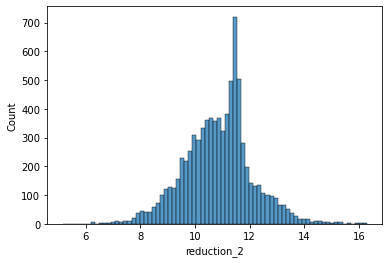

In [21]:
dt['ln(reduction)'] = np.log(dt['reduction'])
sns.histplot(dt['ln(reduction)'])

<AxesSubplot:>

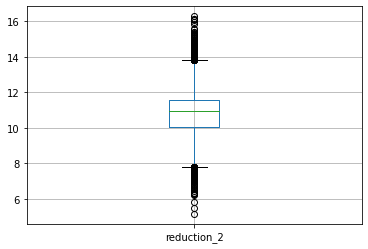

In [22]:
dt.boxplot('ln(reduction)')

E:\anaconda\ana\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='fee_2', ylabel='Count'>

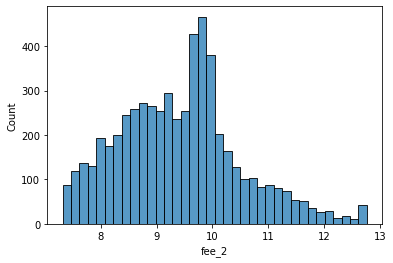

In [23]:
dt['ln(fee)'] = np.log(dt['fee level'])
sns.histplot(dt['ln(fee)'])

<AxesSubplot:>

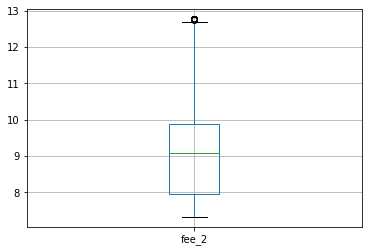

In [26]:
dt.boxplot('fee_2')